In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


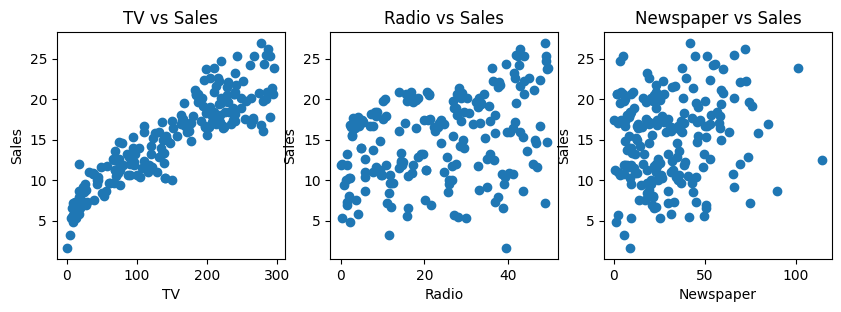

In [4]:
graph = plt.figure(figsize=(10, 10))

graph.add_subplot(3, 3, 1)
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

graph.add_subplot(3, 3, 2)
plt.scatter(data['Radio'], data['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

graph.add_subplot(3, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

plt.show()

In [12]:
def linReg(x, y):
    x_train, x_test, y_train, y_test = train_test_split(data[x], data[y], test_size=0.3)
    x_train = x_train.to_numpy().reshape(-1, 1)
    y_train = y_train.to_numpy().reshape(-1, 1)
    x_test = x_test.to_numpy().reshape(-1, 1)
    y_test = y_test.to_numpy().reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    print(f"Correlation Coeff = {lr.coef_[0][0]}, Intercept = {lr.intercept_[0]}")

    y_pred = lr.predict(x_test)
    print("Linear regression line = y = {:.3} + {:.2}x ".format(lr.coef_[0][0], lr.intercept_[0]))

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"rmse={rmse}, mae={mae}")

    plt.scatter(x_train, y_train)
    plt.scatter(x_test, y_test)
    plt.xlabel('Money spent on ' + x)
    plt.ylabel(y)
    plt.title(x+" vs "+y)
    plt.plot(x_test, y_pred, c='gold')

Correlation Coeff = 0.053571024954746686, Intercept = 7.2210159570978565
Linear regression line = y = 0.0536 + 7.2x 
rmse=2.325537015302254, mae=1.9056004447504344
Correlation Coeff = 0.13988809809774494, Intercept = 11.96677324242907
Linear regression line = y = 0.14 + 1.2e+01x 
rmse=4.722059650645002, mae=4.022105013180566
Correlation Coeff = 0.04763855472085632, Intercept = 13.632275733687731
Linear regression line = y = 0.0476 + 1.4e+01x 
rmse=5.410253491215, mae=4.59998130096818


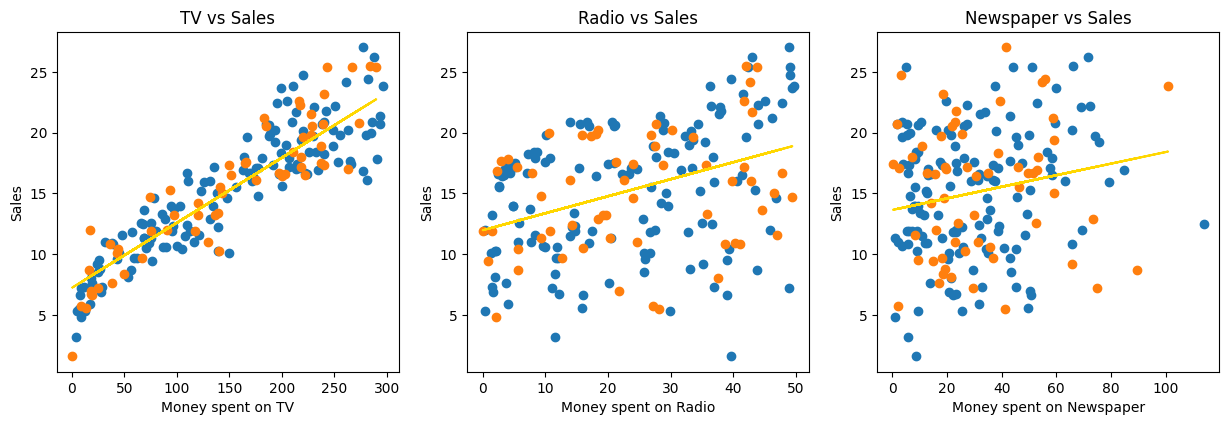

In [13]:
sheet = plt.figure(figsize=(15, 15))
sheet.add_subplot(3, 3, 1)
linReg('TV', 'Sales')
sheet.add_subplot(3, 3, 2)
linReg('Radio', 'Sales')
sheet.add_subplot(3, 3, 3)
linReg('Newspaper', 'Sales')